In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


https://www.kaggle.com/code/lusfernandotorres/data-science-for-financial-markets/**notebook**

In [5]:
pip install pyfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 761.5 kB/s eta 0:00:00


In [6]:
pip install quantstats


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 548.9 kB/s eta 0:00:00


In [7]:
pip install pyportfolioopt   ### It includes a range of optimization algorithms, such as the mean-variance optimization model, the Black-Litterman allocation model, and many others.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 826.0 kB/s eta 0:00:00


In [8]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=bb8b8eaaf762171335dcfb11816e5d21b50beb0b6c17d2dc80b0ab7faac5429e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [9]:
import quantstats as qs
import pandas as pd

In [25]:
apple = qs.utils.download_returns("AAPL")
tesla = qs.utils.download_returns("TSLA")
disney = qs.utils.download_returns("DIS")
amd= qs.utils.download_returns("AMD")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
apple.dtypes

dtype('float64')

In [12]:
apple.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2023-12-01', '2023-12-04', '2023-12-05', '2023-12-06',
               '2023-12-07', '2023-12-08', '2023-12-11', '2023-12-12',
               '2023-12-13', '2023-12-14'],
              dtype='datetime64[ns]', name='Date', length=10843, freq=None)

In [13]:
apple[0:10]

Date
1980-12-12         NaN
1980-12-15   -0.052171
1980-12-16   -0.073398
1980-12-17    0.024751
1980-12-18    0.028992
1980-12-19    0.061029
1980-12-22    0.048670
1980-12-23    0.042199
1980-12-24    0.052628
1980-12-26    0.092309
Name: Close, dtype: float64

In [14]:
apple['1980-12-12']

nan

In [15]:
apple['1980-12-12':'1990-12-12']

Date
1980-12-12         NaN
1980-12-15   -0.052171
1980-12-16   -0.073398
1980-12-17    0.024751
1980-12-18    0.028992
                ...   
1990-12-06    0.028038
1990-12-07    0.030301
1990-12-10   -0.017646
1990-12-11   -0.041916
1990-12-12   -0.009374
Name: Close, Length: 2529, dtype: float64

In [21]:
start_date = '1981-01-01'
end_date = '2020-01-01'

In [26]:
apple_series_data = apple[start_date : end_date]
tesla_series_data = apple[start_date : end_date]
disney_series_data = apple[start_date : end_date]
amd_series_data = apple[start_date : end_date]

In [23]:
apple_series_data.head()

Date
1981-01-02    0.010988
1981-01-05   -0.021738
1981-01-06   -0.044448
1981-01-07   -0.042633
1981-01-08   -0.020242
Name: Close, dtype: float64

In [24]:
apple_series_data.tail()

Date
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Close, dtype: float64

In [30]:
apple_series_data.describe()

count    9834.000000
mean        0.001045
std         0.028598
min        -0.518692
25%        -0.013273
50%         0.000000
75%         0.014707
max         0.332280
Name: Close, dtype: float64

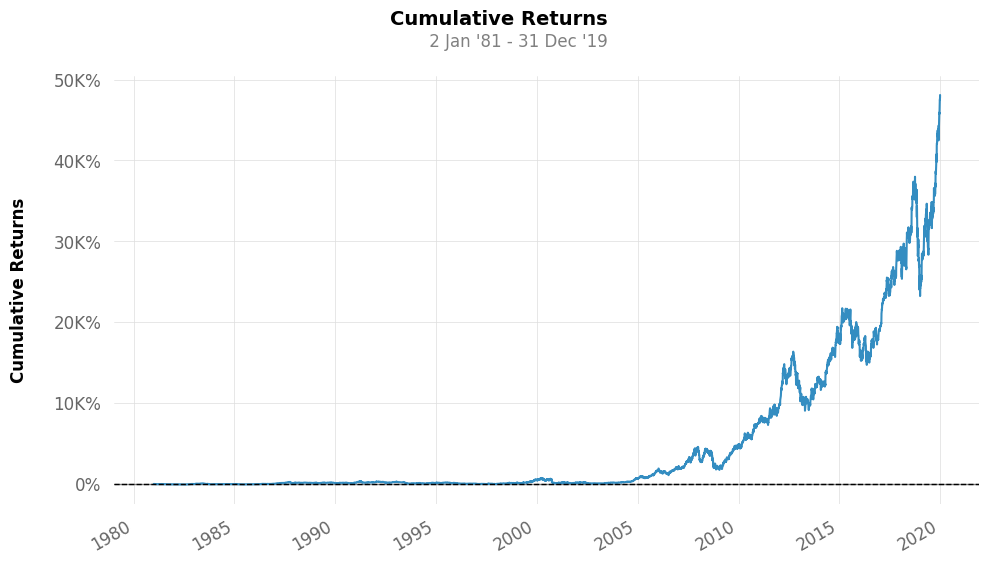

In [28]:
qs.plots.returns(apple_series_data)

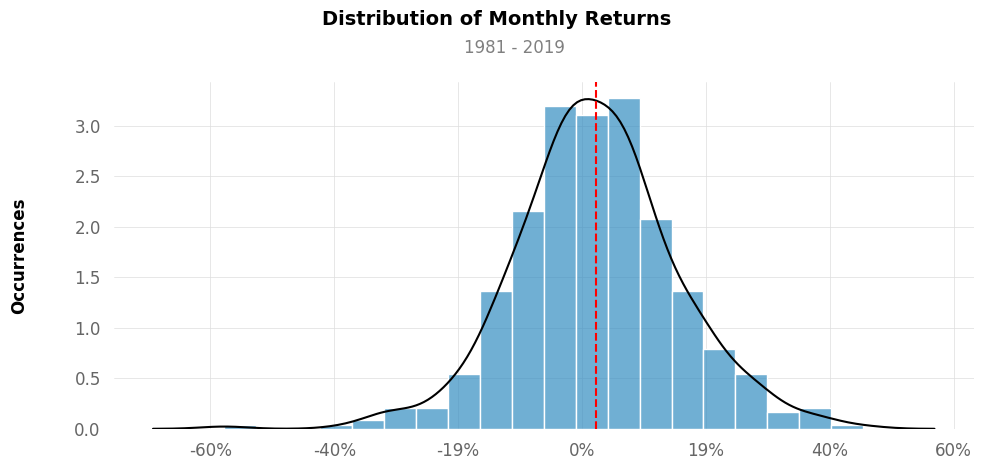

In [29]:
qs.plots.histogram(apple_series_data)

In [37]:
###########   https://wire.insiderfinance.io/flip-a-coin-a-monte-carlo-simulation-9815a809d992

import yfinance as yf
import numpy as np

# Loading data for the SP500 Index
spy = yf.download('AAPL',
                  start = start_date,
                  end = end_date)

print('Number of samples::::--> ' + str(len(spy)))
number_of_simulations = 10000 # 10,000 simulations
trading_costs = 0.001 # 0.1% of cost per trade

# Creating coins numpy array
coins = np.random.randint(0, 2,
                          size = (len(spy), number_of_simulations))
# Displaying coins numpy array
coins.shape

[*********************100%%**********************]  1 of 1 completed
Number of samples::::--> 9834


(9834, 10000)

In [38]:
# Where value in coins is equal to 0, replace 0 by -1
coins = np.where(coins == 0, -1, 1)      ###  0 : No profit no loss     1: profit      -1: loss
coins

array([[-1,  1,  1, ..., -1, -1, -1],
       [ 1,  1, -1, ..., -1,  1,  1],
       [-1,  1, -1, ...,  1, -1,  1],
       ...,
       [ 1,  1,  1, ..., -1,  1,  1],
       [-1, -1,  1, ..., -1, -1,  1],
       [-1,  1,  1, ...,  1,  1, -1]])

In [40]:
# Computing daily returns
spy['returns'] = spy['Adj Close'].pct_change()
spy['returns'].head()

Date
1981-01-02         NaN
1981-01-05   -0.021737
1981-01-06   -0.044448
1981-01-07   -0.042633
1981-01-08   -0.020242
Name: returns, dtype: float64

In [42]:
coins[:0]

array([], shape=(0, 10000), dtype=int64)

In [41]:
# Applying the simulation on the first column in 'coins'
simulation = pd.DataFrame(coins[:,0] * spy['returns'] - trading_costs).cumsum()

In [ ]:
for i in range(1, number_of_simulations):
    simulation = pd.concat([simulation, pd.DataFrame(coins[:,i] * spy['returns'] - trading_costs).cumsum()], axis = 1)

In [ ]:
# Plotting Histogram of Total Returns
fig = go.Figure(data=[go.Histogram(x = simulation.iloc[-1] * 100)])

fig.update_layout(title_text = 'Flip a Coin - Distribution of Total Returns',
                 xaxis_title = 'Total Returns',
                 yaxis_title = 'Frequency')

fig.show()

In [ ]:
for col in simulation.columns:
    simulation[col] = np.where(simulation[col] < -1, -1, simulation[col]) # Replacing values lower than -1 by -1

simulation = simulation * 100 # Obtaining values in percentage

In [ ]:
# Plotting Cumulative Returns over time for each simulation
plt.figure(figsize = (15,15))
plt.plot(simulation, linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Total Returns (%)')
plt.title('Trading the S&P500 Based on the Flip of a Coin - 10,000 Simulations Total Returns')
plt.style.context('seaborn-deep')
plt.show()